In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Nkrho = 200
Nkz = 401
dkrho = 0.125
dkz = 0.125

krho_max = Nkrho * dkrho
kz_max = ( Nkz -1 ) *0.5 * dkz

In [3]:
krho_ax = linspace(dkrho,krho_max,Nkrho,endpoint=True)
kz_ax = linspace(-kz_max,kz_max,Nkz,endpoint=True)

KRHO, KZ = meshgrid(kz_ax,krho_ax)

In [4]:
gr = loadtxt('ground.dat')

In [5]:
ground = reshape(gr,(Nkrho,Nkz))

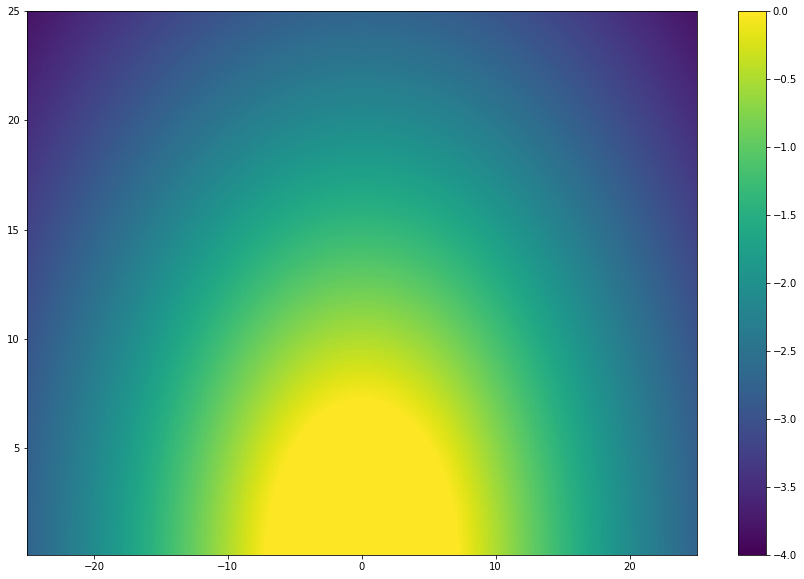

In [6]:
figure(figsize=(15,10))
pcolormesh(KRHO,KZ,log10(ground),vmin=-4,vmax=0)
colorbar()

In [8]:
laser   = loadtxt('laser.dat')
acc     = loadtxt('acceleration.dat')

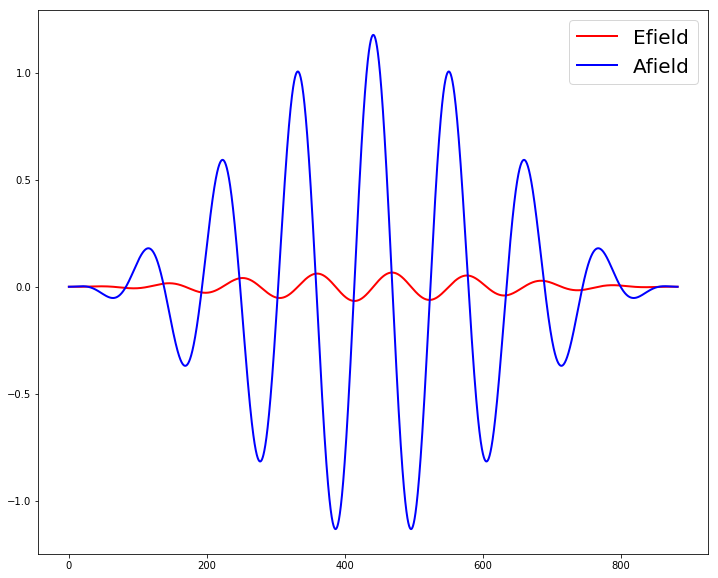

In [9]:
figure(figsize=(12,10))
plot(laser[:,0],laser[:,1],lw=2,color='red',label=r'Efield')
plot(laser[:,0],laser[:,2],lw=2,color='blue',label=r'Afield')
legend(fontsize=20)

/Users/adelacalle/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


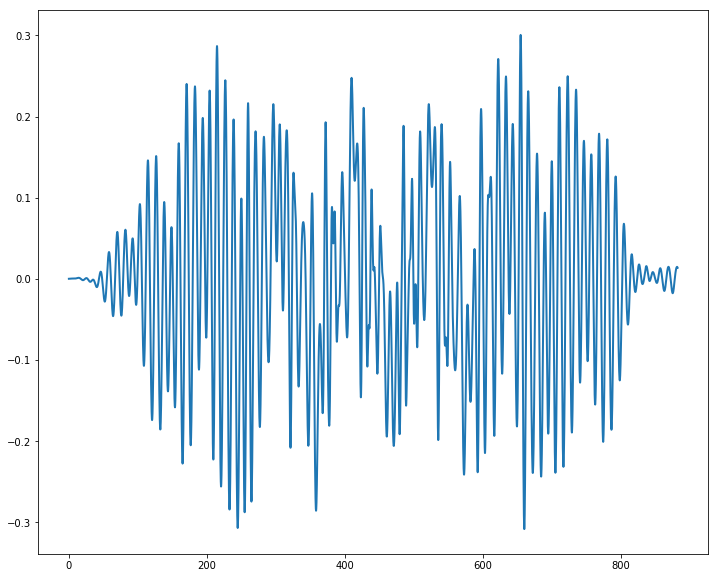

In [11]:
figure(figsize=(12,10))
plot(acc[:,0],acc[:,1],lw=2)
legend(fontsize=20)

In [12]:
ntime = len(acc[:,0])
dt = acc[1,0]- acc[0,0]
ww = fft.fftfreq(ntime,dt)*2.0*pi
indx_p= where(ww>=0.0)
w = ww[indx_p]
w0 = 0.057

In [13]:
wfield = fft.fft(acc[:,1])/sqrt(ntime)
wfield = wfield[indx_p]
hhg = abs(wfield)**2

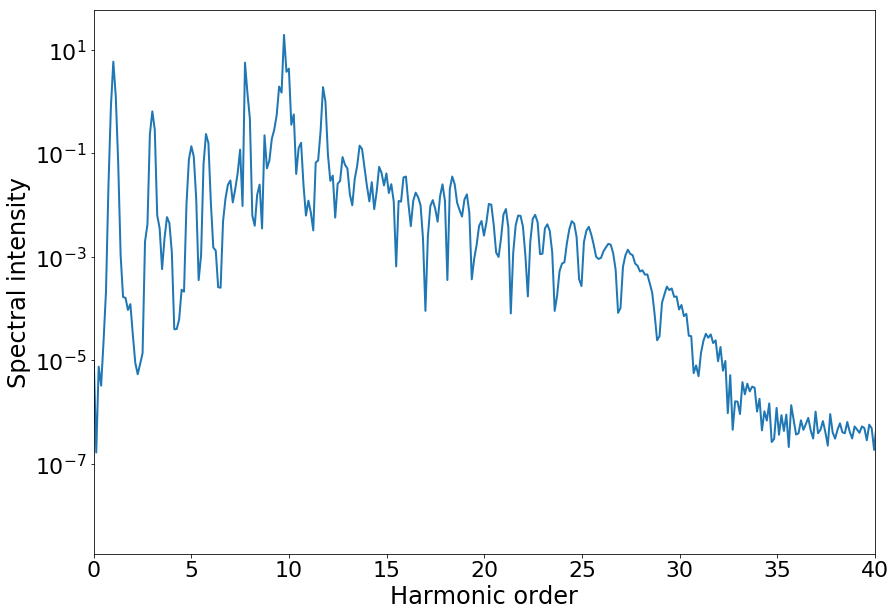

In [14]:
figure(figsize=(14,10))
semilogy(w/w0,hhg,lw=2)
xlim(0,40)

xlabel('Harmonic order',fontsize=24)
ylabel('Spectral intensity',fontsize=24)
tick_params(labelsize=22)